# Analytical model

This is an analytical model to construct a simple SNR of a given spectrum.

In [2]:
%pylab inline --no-import-all
plt.rc('font', family='serif', serif='Times',size=15)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=20)
plt.rc('xtick.major', size=10)
plt.rc('ytick.major', size=10)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('figure',titlesize=25)
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['axes.linewidth'] = 2.
from astropy.io import fits
import astropy.units as u
import astropy.constants as c
import pandas as pd
import logging as log
from crispy.tools.initLogger import getLogger
log = getLogger('main')
from crispy.tools.image import Image
import os
os.chdir('/Users/mrizzo/IFS/crispy/crispy/WFIRST/')
from params import Params
par = Params()
par.hdr


Populating the interactive namespace from numpy and matplotlib


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
COMMENT                                                                         
COMMENT ************************************************************            
COMMENT ********************** General parameters ******************            
COMMENT ************************************************************            
COMMENT                                                                         
NLENS   =                  108 / # lenslets across array                        
PITCH   =             0.000174 / Lenslet pitch (meters)                         
INTERLAC=                  2.0 / Interlacing                                    
PHILENS =    26.565051177077

## Load QE

In [127]:
from scipy.interpolate import interp1d
loadQE = np.loadtxt(par.codeRoot+"/QE_CCD201.txt")
QE = interp1d(loadQE[:,0]/1000,loadQE[:,1])

## Load planet fluxes

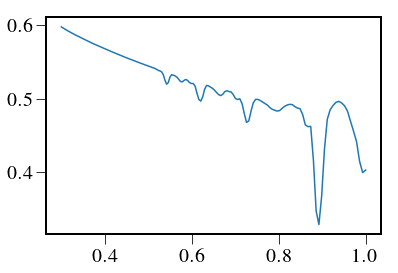

In [161]:
import pandas as pd
table = pd.read_table(par.codeRoot+"/Inputs/LAS_spectra_for_exospec_bright_comparison_0deg_g0.0_EDC_012618_by_SRH.txt",
                     names=('wavelength','albedo','contrast','star','flux'),
                     delimiter=',')
plt.plot(table['wavelength'],table['albedo'])

## Load stellar spectrum and convert to photons

In [210]:
from astropy.table import Table,QTable
fname = par.codeRoot+'/Inputs/ETC/Spectra.csv'
st = pd.read_csv(fname,skip_blank_lines=True,)
stars = QTable.from_pandas(st)
stars['Wavelength (m) '].unit = u.m
stars.rename_column('Wavelength (m) ', 'Wavelength')
stars['E_ph (J)'].unit = u.J/u.ph
stars.rename_column('E_ph (J)', 'E_ph')
cols = ['a0v','a5v','f5v','g0v','g5v','k0v','k5v','m0v','m5v']
for col in cols:
    stars[col].unit = u.W/u.m**2/u.m


Unit("ph / (m2 s)")

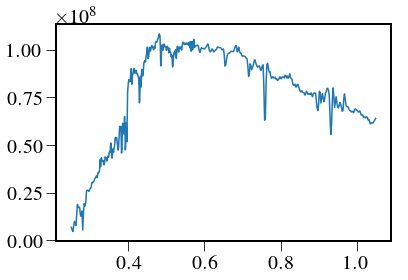

In [211]:
star_ph_flux = (stars['g0v']/stars['E_ph']*u.nm).to(u.ph/u.s/u.m**2)
plt.plot(stars['Wavelength'].to(u.um),star_ph_flux)
star_ph_flux.unit


In [212]:
# wl = stars['Wavelength'].to(u.um)
# wmax = 0.721
# wmin=0.6
# star_ph_flux = star_ph_flux[wl.value>wmin]
# wl = wl[wl.value>wmin]
# star_ph_flux = star_ph_flux[wl.value<wmax]
# wl = wl[wl.value<wmax]
# np.sum(star_ph_flux)

## Load planet albedo and convert to planet photons per 1 nm

In [213]:
albedo = interp1d(table['wavelength'],table['contrast'])
wl = stars['Wavelength'].to(u.um)
print np.amin(table['wavelength']),np.amin(wl)
print np.amax(table['wavelength']),np.amax(wl)
print len(wl),len(star_ph_flux)
star_ph_flux = star_ph_flux[wl.value>np.amin(table['wavelength'])]
wl = wl[wl.value>np.amin(table['wavelength'])]
star_ph_flux = star_ph_flux[wl.value<np.amax(table['wavelength'])]
wl = wl[wl.value<np.amax(table['wavelength'])]
print np.amin(table['wavelength']),np.amin(wl)
print np.amax(table['wavelength']),np.amax(wl)

planet_ph_flux = star_ph_flux*albedo(wl)

0.30003 0.25 um
0.99899 1.05 um
801 801
0.30003 0.301 um
0.99899 0.998 um


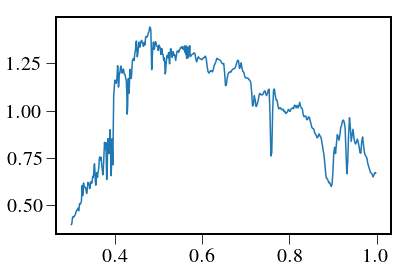

In [214]:
plt.plot(wl,planet_ph_flux)

## Star magnitude, bandwidth

In [215]:
Vmag=5
planet_ph_flux *= 10**(-0.4*Vmag)
wmax = 0.721
wmin=0.6
planet_ph_flux = planet_ph_flux[wl.value>wmin]
star_ph_flux = star_ph_flux[wl.value>wmin]
wl = wl[wl.value>wmin]
planet_ph_flux = planet_ph_flux[wl.value<wmax]
star_ph_flux = star_ph_flux[wl.value<wmax]
wl = wl[wl.value<wmax]
print np.sum(planet_ph_flux)

1.45337044513 ph / (m2 s)


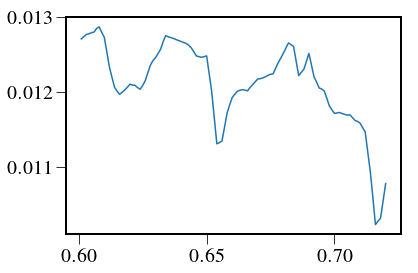

In [216]:
plt.plot(wl,planet_ph_flux)

In [217]:
print wl

[ 0.601  0.602  0.603  0.604  0.605  0.606  0.607  0.608  0.609  0.61
  0.611  0.612  0.613  0.614  0.615  0.616  0.617  0.618  0.619  0.62
  0.621  0.622  0.623  0.624  0.625  0.626  0.627  0.628  0.629  0.63
  0.631  0.632  0.633  0.634  0.635  0.636  0.637  0.638  0.639  0.64
  0.641  0.642  0.643  0.644  0.645  0.646  0.647  0.648  0.649  0.65
  0.651  0.652  0.653  0.654  0.655  0.656  0.657  0.658  0.659  0.66
  0.661  0.662  0.663  0.664  0.665  0.666  0.667  0.668  0.669  0.67
  0.671  0.672  0.673  0.674  0.675  0.676  0.677  0.678  0.679  0.68
  0.681  0.682  0.683  0.684  0.685  0.686  0.687  0.688  0.689  0.69
  0.691  0.692  0.693  0.694  0.695  0.696  0.697  0.698  0.699  0.7    0.701
  0.702  0.703  0.704  0.705  0.706  0.707  0.708  0.709  0.71   0.711
  0.712  0.713  0.714  0.715  0.716  0.717  0.718  0.719  0.72 ] um


In [218]:
from crispy.tools.detutils import rebin
nbins = 10
pl_ph_flux = planet_ph_flux.reshape(nbins,len(planet_ph_flux)/nbins).sum(-1)
w = wl.reshape(nbins,len(planet_ph_flux)/nbins).mean(-1)

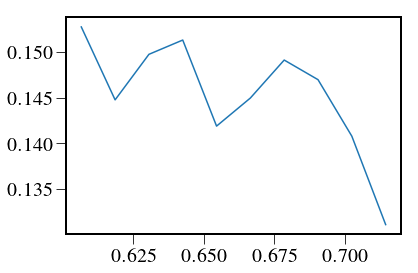

In [219]:
plt.plot(w,pl_ph_flux)

In [220]:
tau=0.0144
A = 3.68*u.m**2
pl_ph = pl_ph_flux*A*tau
print pl_ph

[ 0.00809308  0.00767113  0.00793455  0.00801717  0.00751928  0.00768185
  0.00790146  0.00778796  0.00746096  0.00694957] ph / s


In [221]:
effQE = QE(w)*0.9*0.97*0.9*0.81
print effQE
pl_e_rate = pl_ph*effQE*u.count/u.ph
print pl_e_rate

[ 0.57065367  0.5701678   0.56886772  0.56605492  0.56160082  0.55581856
  0.54847324  0.53971917  0.5287044   0.51569647]
[ 0.00461835  0.00437383  0.00451371  0.00453816  0.00422284  0.00426971
  0.00433374  0.00420331  0.00394464  0.00358387] ct / s


In [229]:
zodi = 1.1e-3*u.ct/u.s
CFcontrast = 2.2e-9
I_pk = 1.4e-3
cgi_mpix = 36
sp_tau = 0.34
# speckle = 1.56e-3*u.ct/u.s
Vmag=5
star_ph_flux *= 10**(-0.4*Vmag)
st_ph_flux = star_ph_flux.reshape(nbins,len(star_ph_flux)/nbins).sum(-1)

w = wl.reshape(nbins,len(star_ph_flux)/nbins).mean(-1)
speckle = st_ph_flux*A*QE(w)*u.ct/u.ph*cgi_mpix*sp_tau*I_pk*CFcontrast
print speckle
mpix = 20
cic=2e-2*u.ct
ftime = 100*u.s
phconv_rate = (zodi+speckle+pl_e_rate)
dark = 2.24e-4*u.ct/u.s
perpxrate = dark+phconv_rate/mpix
print perpxrate

[ 0.00151836  0.0014845   0.00149163  0.001492    0.00140476  0.00143282
  0.00144133  0.00140326  0.00133737  0.00123441] ct / s
[ 0.00058584  0.00057192  0.00057927  0.00058051  0.00056038  0.00056413
  0.00056775  0.00055933  0.0005431   0.00051991] ct / s


In [275]:
obstime = 100*3600*u.s
mult = 1.32
fpp=0.1
shotnoise = np.sqrt((pl_e_rate+mult*(speckle+zodi))*obstime)
elecnoise = np.sqrt(mult*mpix*(dark+cic/ftime)*obstime)
spnoise = fpp*speckle*obstime
print shotnoise,elecnoise,spnoise
print pl_e_rate*obstime
SNR = pl_e_rate*obstime/(shotnoise.value+elecnoise.value+spnoise.value)
print SNR

[ 53.91518859  52.94086762  53.44600857  53.52993604  52.06230568
  52.3516173   52.60972596  51.98788104  50.77703737  48.98475874] ct(1/2) 63.4798865783 ct(1/2) [ 54.66081145  53.44211246  53.69856845  53.71187411  50.57140544
  51.58142161  51.88773338  50.51732028  48.14518613  44.43888876] ct
[ 1662.60484934  1574.57957961  1624.93472883  1633.73731466  1520.22112128
  1537.0970692   1560.14518525  1513.19114768  1420.07106699  1290.19325706] ct
[ 9.66316749  9.26971039  9.52345692  9.56959394  9.15169584  9.18147189
  9.28783091  9.11642827  8.74416636  8.22284383] ct


[ 0.6065  0.6185  0.6305  0.6425  0.6545  0.6665  0.6785  0.6905  0.7025
  0.7145] um [  1.25592302e-08   1.20699203e-08   1.24819111e-08   1.25135395e-08
   1.23654764e-08   1.22378358e-08   1.23811491e-08   1.23411420e-08
   1.21185700e-08   1.19851260e-08] [  1.29970119e-09   1.30208170e-09   1.31064919e-09   1.30763537e-09
   1.35116776e-09   1.33288387e-09   1.33305065e-09   1.35372556e-09
   1.38590341e-09   1.45754027e-09]


<Container object of 3 artists>

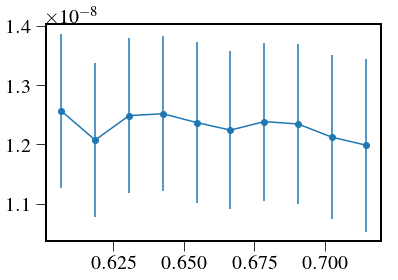

In [276]:

vals = albedo(w)
SNR = SNR.value
print w,vals,vals/SNR
plt.errorbar(w.value,vals,yerr=vals/SNR,fmt='-o')
